In [1]:
%matplotlib inline

from sklearn import datasets, model_selection
import copy
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
from pennylane import numpy as np
from concrete_VQC_model import *
import seaborn as sns
import pandas as pd

In [2]:
def quantum_nn(data, weights):
    vqc = concrete_VQC(data, weights)
    return (1-vqc())/2 # probability of measure 1


def calc_loss(prediction, target):
    return (prediction-target)**2


def gradient(X_i, Y_i, theta):
    delta = 0.01
    grad = []
    dtheta = copy.copy(theta)
    for i in range(len(theta)):
        dtheta[i] += delta

        predict1 = quantum_nn(X_i,dtheta)
        predict2 = quantum_nn(X_i,theta)

        # Finite difference
        grad.append( (calc_loss(predict1,Y_i) - calc_loss(predict2,Y_i)) / delta )
    return np.array(grad)


def accuracy(X,Y,theta):
    counter = 0
    for X_i,Y_i in zip(X,Y):
        prediction = quantum_nn(X_i,theta)

        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
    return (counter/len(Y))

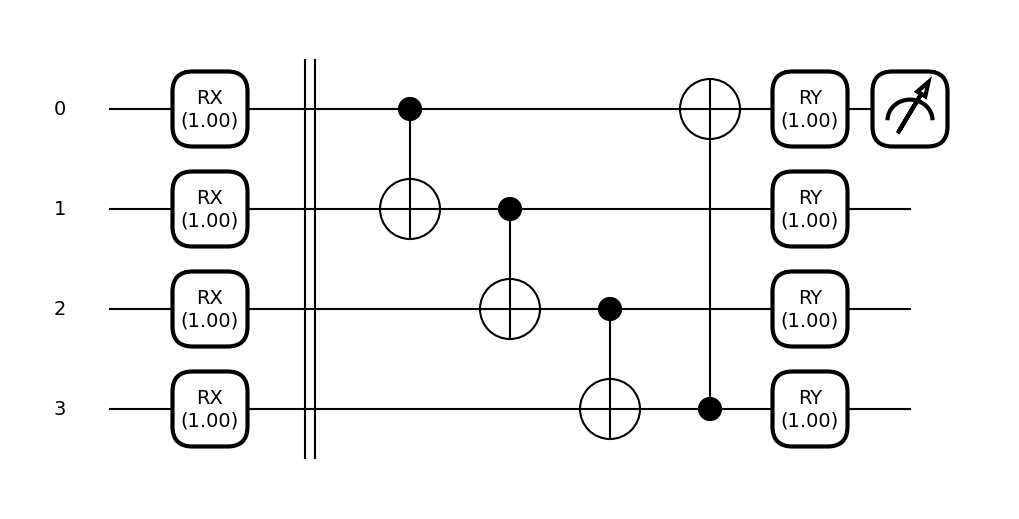

In [3]:
vqc = concrete_VQC(data=np.ones(4), weights=np.ones(4))
qml.draw_mpl(vqc.circuit,decimals=2)()
plt.savefig("QCL_iris.pdf", format='pdf')
plt.show()


X min: 0.1
X max: 7.0
Epoch 	 Loss 	 Accuracy
0 	 0.296 	 0.145
1 	 0.279 	 0.145
2 	 0.257 	 0.855
3 	 0.238 	 0.855
4 	 0.223 	 0.855
5 	 0.214 	 0.855
6 	 0.209 	 0.855
7 	 0.205 	 0.855
8 	 0.203 	 0.855
9 	 0.202 	 0.855
10 	 0.201 	 0.855
11 	 0.201 	 0.855
12 	 0.201 	 0.855
13 	 0.201 	 0.855
14 	 0.201 	 0.855
Epoch 	 Loss 	 Accuracy
0 	 0.297 	 0.145
1 	 0.280 	 0.145
2 	 0.259 	 0.855
3 	 0.239 	 0.855
4 	 0.224 	 0.855
5 	 0.215 	 0.855
6 	 0.209 	 0.855
7 	 0.206 	 0.855
8 	 0.204 	 0.855
9 	 0.202 	 0.855
10 	 0.202 	 0.855
11 	 0.201 	 0.855
12 	 0.201 	 0.855
13 	 0.201 	 0.855
14 	 0.201 	 0.855
Epoch 	 Loss 	 Accuracy
0 	 0.265 	 0.145
1 	 0.244 	 0.855
2 	 0.228 	 0.855
3 	 0.217 	 0.855
4 	 0.210 	 0.855
5 	 0.206 	 0.855
6 	 0.204 	 0.855
7 	 0.203 	 0.855
8 	 0.202 	 0.855
9 	 0.201 	 0.855
10 	 0.201 	 0.855
11 	 0.201 	 0.855
12 	 0.201 	 0.855
13 	 0.201 	 0.855
14 	 0.201 	 0.855
Epoch 	 Loss 	 Accuracy
0 	 0.214 	 0.855
1 	 0.209 	 0.855
2 	 0.205 	 0.855
3 	

/tmp/ipykernel_20353/3890028129.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_results, x='epoch', y='accuracy', ci='sd')


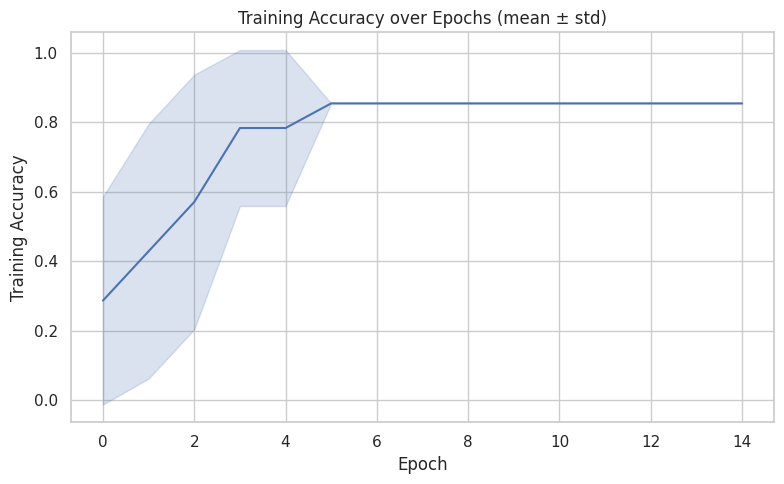

In [8]:
iris = datasets.load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.38,random_state=42)

# print ranges of X
print(f"X min: {np.min(X)}")
print(f"X max: {np.max(X)}")

N = 4

epochs = 15
eta = 0.1
loss_list = []
acc_list = []
results = []
tests = 10


thetas = [np.random.uniform(0, 2**np.pi, N) for _ in range(tests)]# For reproducibility
for i in range(tests):
    theta = thetas[i]

    print(f'Epoch \t Loss \t Accuracy')
    for epoch in range(epochs):
        loss_tmp = []
        for X_i, Y_i in zip(X_train, Y_train):
            prediction = quantum_nn(X_i, theta)
            loss_tmp.append(calc_loss(prediction, Y_i))
    
            # Update theta by using SGD
            theta = theta - eta * gradient(X_i, Y_i, theta)
        loss_list.append(np.mean(loss_tmp))
        acc = accuracy(X_train, Y_train, theta)
        acc_list.append(acc)
        results.append({'epoch': epoch, 'accuracy': acc})
        
    
        print(f'{epoch} \t {loss_list[-1]:.3f} \t {acc:.3f}')

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_results, x='epoch', y='accuracy', ci='sd')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs (mean ± std)')
plt.tight_layout()
plt.show()
# print(vqc)

In [ ]:
print("Saving weights")
# np.savetxt('weights.txt', theta)
# print("Weights saved to 'weights.txt'")
# # Save the weights to a file
np.save('weights.npy', theta)
print("Weights saved to 'weights.npy'")
    

In [ ]:
# read the weights from the file
weights = np.load('weights.npy')
print("Weights loaded from 'weights.npy':", weights)